# IMDB Webscrapping Project



IMDB web Top 10 Shows in 2019

## Requesting the Data

Let's begin with requesting the web from the site with `get` method.

In [2]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Released between 2019-01-01 and 2019-12-31\n(Sorted by Popularity Ascending) - IMDb</title>\n  <script>(function(t)'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. After we inspect the data table in the website, we found that the key is 'table' and the class is 'table table-striped table-hover table-hover-solid-row table-simple history-data'

In [5]:
table = soup.find('div',attrs={'lister-list'})
print(table.prettify()[1:500])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt8111088">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt8111088/">
    <img alt="The Mandalorian" class="loadlate" data-tconst="tt8111088" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZDhlMzY0ZGItZTcyNS00ZTAxLWIyMmYtZGQ2ODg5OWZiYmJkXkEyXkFqcGdeQXVyODkzNTgxMDg@._V1_UX67_CR0,0,6


In [6]:
tr = table.find_all('div',attrs={'lister-item-content'})

In [7]:
len(tr)

50

In [8]:
#Data scrapping starts from here:

temp = [] #initiating a tuple f

for i in range(0,len(tr)):
    row = table.find_all('div',attrs={'class':'lister-item-content'})[i]

    #get Judul
    judul = row.find('h3')
    judul = judul.find('a').text
    judul = judul.strip()
    
    #get imdbrating
    imdbrating = row.find('div',attrs={'class':'inline-block ratings-imdb-rating'}).text
    imdbrating = imdbrating.strip()
    
    #get imdbrating
    imdbrating = row.find('div',attrs={'class':'inline-block ratings-imdb-rating'}).text
    imdbrating = imdbrating.strip()  
    
    #get metascore
    try :
        metascore = row.find('span',attrs={'class':'metascore favorable'}).text
        metascore = metascore.strip()
    
    except :
        metascore = 0
        
    #get votes
    votes = row.find('span',attrs={'name':'nv'}).text
    votes = votes.strip()
    
    
    temp.append((judul,imdbrating,metascore,votes))

    
temp

[('The Mandalorian', '8.8', 0, '296,248'),
 ('For All Mankind', '7.7', 0, '13,806'),
 ('The Boys', '8.7', 0, '251,306'),
 ('Avengers: Endgame', '8.4', '78', '826,727'),
 ('The Witcher', '8.2', 0, '303,118'),
 ('Servant', '7.6', 0, '20,217'),
 ('Captain Marvel', '6.9', '64', '452,154'),
 ('Sound of Metal', '7.8', '82', '36,942'),
 ('Euphoria', '8.4', 0, '66,204'),
 ('Gisaengchung', '8.6', '96', '570,768'),
 ('Once Upon a Time... in Hollywood', '7.6', '83', '561,668'),
 ('Batwoman', '3.4', 0, '32,800'),
 ('The Bay', '7.0', 0, '4,168'),
 ('Knives Out', '7.9', '82', '467,431'),
 ('Sex Education', '8.3', 0, '160,224'),
 ('The Gentlemen', '7.8', 0, '247,642'),
 ('ZeroZeroZero', '8.2', 0, '15,146'),
 ('Joker', '8.4', 0, '956,987'),
 ('Capitani', '6.7', 0, '1,915'),
 ('Virgin River', '7.5', 0, '20,539'),
 ('Chernobyl', '9.4', 0, '547,993'),
 ('The Morning Show', '8.4', 0, '53,039'),
 ('Midsommar', '7.1', '72', '205,955'),
 ('Prodigal Son', '7.7', 0, '13,302'),
 ('1917', '8.3', '78', '438,483')

## Creating data frame & Data wrangling

In [9]:
#Put the array into dataframe

import pandas as pd

df = pd.DataFrame(temp,columns = ('judul','imdbrating','metascore','votes'))
df



,judul,imdbrating,metascore,votes
0,The Mandalorian,8.8,0,"296,248"
1,For All Mankind,7.7,0,"13,806"
2,The Boys,8.7,0,"251,306"
3,Avengers: Endgame,8.4,78,"826,727"
4,The Witcher,8.2,0,"303,118"
5,Servant,7.6,0,"20,217"
6,Captain Marvel,6.9,64,"452,154"
7,Sound of Metal,7.8,82,"36,942"
8,Euphoria,8.4,0,"66,204"
9,Gisaengchung,8.6,96,"570,768"


In [11]:
#cleaning process


df['votes']=df['votes'].replace(",","",regex=True)
df['votes']=df['votes'].astype('int')


df['imdbrating']=df['imdbrating'].astype('float64')


df['metascore']=df['metascore'].astype('float64')

df.head()

,judul,imdbrating,metascore,votes
0,The Mandalorian,8.8,0.0,296248
1,For All Mankind,7.7,0.0,13806
2,The Boys,8.7,0.0,251306
3,Avengers: Endgame,8.4,78.0,826727
4,The Witcher,8.2,0.0,303118


## Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:title={'center':'Top 10 shows votes di IMDB dengan di 2019'}, xlabel='Judul', ylabel='Jumlah Votes'>

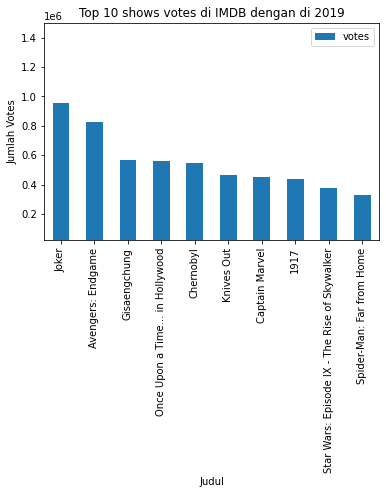

In [29]:
#subset to the most votes show in 2019 in IMDB

imdbvotes = df.loc[:,['judul','votes']].set_index('judul')
imdbvotes = imdbvotes.sort_values(by='votes',ascending=False).head(10)
imdbvotes.plot(kind='bar',xlabel='Judul',ylabel='Jumlah Votes',title='Top 10 shows votes di IMDB dengan di 2019',ylim=(20000,1500000))

We can see that Joker is the winner of top votes show in 2019 with more tha >800,000 votes. It was so popular in 2019!


<AxesSubplot:title={'center':'Top 10 shows best rate di IMDB dengan di 2019'}, xlabel='Judul', ylabel='IMDB Rating'>

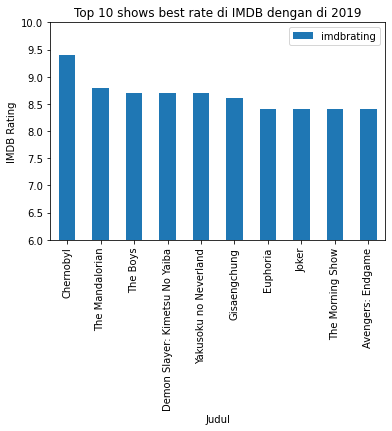

In [31]:
#visualisasi grafik ke dua

imdbrate = df.loc[:,['judul','imdbrating']].set_index('judul')
imdbrate =imdbrate.sort_values(by='imdbrating',ascending=False).head(10)
imdbrate.plot(kind='bar',xlabel='Judul',ylabel='IMDB Rating',title='Top 10 shows best rate di IMDB dengan di 2019', ylim=(6,10))

We can see that Chernobyl is the best rating show in 2019. It wons the heart of the viewers and critics!